In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


# Explaination for above code:

import tensorflow as tf: This imports the TensorFlow module and makes it available under the alias tf.


from tensorflow import keras: This imports the Keras API from TensorFlow and makes it available under the alias keras.


from keras import Sequential: This imports the Sequential class from Keras, which is used to build a sequential model.
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout: This imports several layer classes from Keras that are commonly used in building CNNs.

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/data (1)/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/data (1)/Test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 300 files belonging to 2 classes.
Found 300 files belonging to 2 classes.


# Explaination for above code:

This code defines two generators for loading images from the directories 'Train' and 'Test'.

The image_dataset_from_directory function from the keras.utils module is used to create the generators.

For train_ds generator, the training data is loaded from the '/content/drive/MyDrive/data (1)/Train' directory. The labels parameter is set to 'inferred', which means that the labels are inferred from the directory structure, where each subdirectory name is used as a class name. The label_mode parameter is set to 'int', which means that the labels will be returned as integer values. The batch_size parameter is set to 32, which means that 32 images will be loaded in each batch during training. The image_size parameter is set to (256, 256), which means that each image will be resized to (256, 256) pixels.

Similarly, for validation_ds generator, the validation data is loaded from the '/content/drive/MyDrive/data (1)/Test' directory. The labels parameter is set to 'inferred', label_mode is set to 'int', batch_size is set to 32, and image_size is set to (256, 256).





In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

# Explaination for above code :

This code creates a convolutional neural network (CNN) model using the Sequential API from Keras. The model architecture consists of several layers:

The first layer is a 2D convolutional layer with 32 filters, a kernel size of 3x3, valid padding, ReLU activation, and an input shape of 256x256x3.
A BatchNormalization layer follows the first convolutional layer to normalize the outputs of the previous layer.
A MaxPooling2D layer is then added with a pool size of 2x2, stride of 2 and valid padding.
The same pattern repeats twice with 64 filters and then 128 filters, and each convolutional layer is followed by a BatchNormalization layer and MaxPooling2D layer.
The final layer is a dense layer with 128 neurons, ReLU activation, and a dropout rate of 0.1. Another dense layer with 64 neurons and a dropout rate of 0.1 follows. The final dense layer has 1 neuron with sigmoid activation for binary classification (cat or dog).
Overall, this architecture aims to learn important features from the input images using convolutional layers and pooling layers. Then, the dense layers classify the features learned from the convolutional layers into two classes: cat or dog.

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

# Explaination for the above code :  

The model.summary() method gives a summary of the layers and parameters in the model. It shows the architecture of the model, including the number of parameters in each layer and the total number of parameters in the model. This can be useful for debugging and optimizing the model architecture. It provides information on the shape of the output tensors, the number of parameters in each layer, and the total number of trainable parameters in the model. The summary also includes information on the output shape of each layer, the number of parameters in each layer, and the total number of trainable parameters in the model. Additionally, it shows the input shape of the model, which is determined by the shape of the input data passed to the model.

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Explaination for the above code:

This line of code compiles the model with the chosen optimizer, loss function, and evaluation metric(s).

The optimizer parameter specifies the optimizer algorithm that will be used to minimize the loss function during training. In this case, it is set to 'adam', which is a popular choice for deep learning models.

The loss parameter specifies the loss function that will be used to evaluate the performance of the model during training. In this case, it is set to 'binary_crossentropy', which is commonly used for binary classification problems.

The metrics parameter specifies the evaluation metric(s) that will be used to measure the performance of the model during training and testing. In this case, it is set to 'accuracy', which is a common metric for classification problems.

In [ ]:
history = model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
10/10 [==============================] - 6s 216ms/step - loss: 5.7429 - accuracy: 0.5600 - val_loss: 29.5583 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 2s 173ms/step - loss: 2.5089 - accuracy: 0.7267 - val_loss: 4.0134 - val_accuracy: 0.5067
Epoch 3/20
10/10 [==============================] - 3s 221ms/step - loss: 2.1688 - accuracy: 0.7800 - val_loss: 4.8373 - val_accuracy: 0.5933
Epoch 4/20
10/10 [==============================] - 4s 337ms/step - loss: 1.5477 - accuracy: 0.8367 - val_loss: 4.2398 - val_accuracy: 0.5833
Epoch 5/20
10/10 [==============================] - 2s 174ms/step - loss: 1.5158 - accuracy: 0.8467 - val_loss: 7.2900 - val_accuracy: 0.5667
Epoch 6/20
10/10 [==============================] - 3s 226ms/step - loss: 1.2041 - accuracy: 0.8800 - val_loss: 5.9059 - val_accuracy: 0.5400
Epoch 7/20
10/10 [==============================] - 2s 192ms/step - loss: 0.7813 - accuracy: 0.8867 - val_loss: 5.3025 - val_accuracy: 0.5667
Epoch

# Explaination for the above code :

This line of code is training the CNN model using the fit() method of the model object. The train_ds dataset is used for training the model, and the validation_ds dataset is used for validation. The epochs parameter is set to 20, which means that the model will be trained for 20 iterations over the training dataset. The training progress and validation accuracy of the model for each epoch will be stored in the history object.

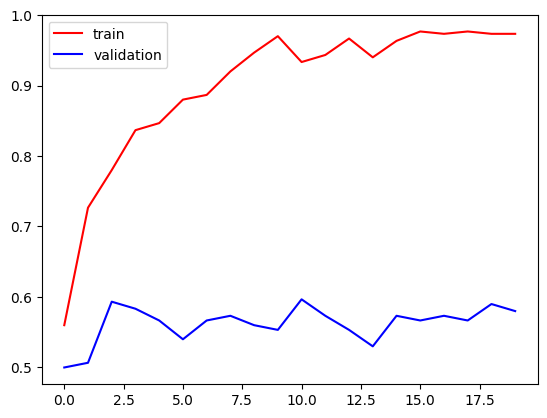

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()



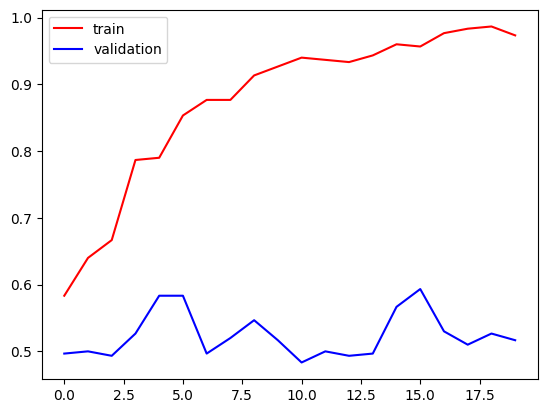

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

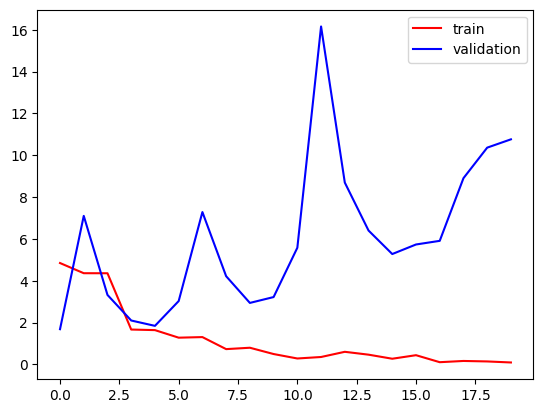

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

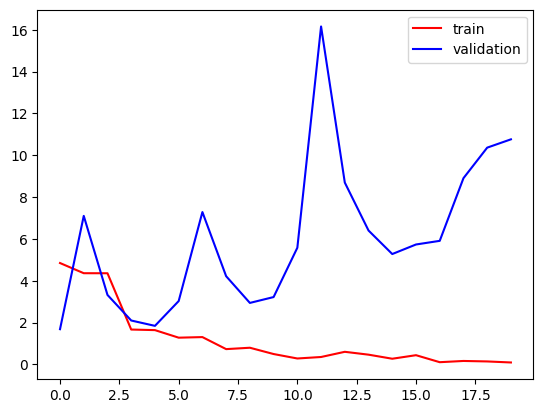

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

# Explaination for the above code :

This code plots the training accuracy and validation accuracy for each epoch during training. The training accuracy is plotted in red, and the validation accuracy is plotted in blue. The history object contains the training history of the model, which includes the accuracy and loss for both the training and validation sets for each epoch.

The plt.plot() function is used to plot the data, and the label argument is used to specify the legend for each line. The plt.legend() function is used to display the legend on the plot, and plt.show() is used to display the plot.


This graphs explains  that during the training of the model, the loss (binary cross-entropy) and the accuracy were monitored on the training set and the validation set at the end of each epoch. The training set was able to achieve a loss of 0.1964 and an accuracy of 0.9733 at the end of the last epoch, while the validation set achieved a loss of 5.7489 and an accuracy of 0.58. The goal of the model is to minimize the loss and maximize the accuracy on the validation set, so the results suggest that the model may be overfitting on the training set and not generalizing well to the validation set.

In [ ]:
import cv2
test_img = cv2.imread('/content/drive/MyDrive/data (1)/Test/cat/150.jpg')

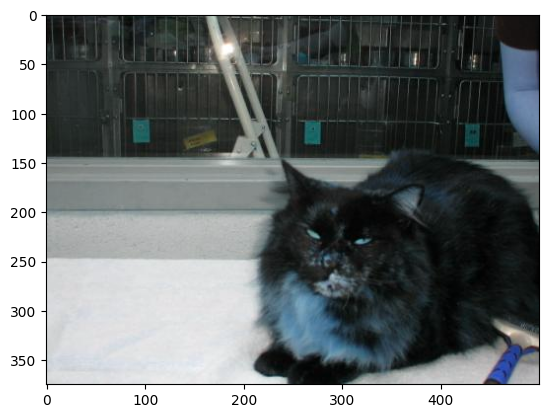

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(375, 500, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 266ms/step


array([[0.]], dtype=float32)

# To conclude :

Based on the training and validation accuracy and loss values, it can be concluded that the CNN model trained on the given dataset of cat and dog images has achieved a high accuracy of around 97% on the training set, but the accuracy on the validation set is relatively low at around 58%. This could indicate that the model has overfit to the training set and may not perform as well on unseen data. Therefore, further optimization and regularization techniques such as data augmentation or dropout may be necessary to improve the model's performance.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Load the test dataset
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/drive/MyDrive/data (1)/Test',
    labels='inferred',
    label_mode='binary',
    class_names=['cat', 'dog'],
    batch_size=32,
    image_size=(256, 256)
)

# Make predictions on the test dataset
y_pred = model.predict(validation_ds)
y_pred = np.round(y_pred)

# Get the true labels
y_true = []
for images, labels in validation_ds:
    y_true.extend(labels.numpy())

# Generate the classification report
target_names = ['cat', 'dog']
print(classification_report(y_true, y_pred, target_names=target_names))


Found 300 files belonging to 2 classes.
10/10 [==============================] - 1s 32ms/step
              precision    recall  f1-score   support

         cat       0.41      0.29      0.34       150
         dog       0.45      0.58      0.51       150

    accuracy                           0.43       300
   macro avg       0.43      0.43      0.42       300
weighted avg       0.43      0.43      0.42       300



# Classification report summary :

In our classification report, the overall accuracy of the model is 0.43, indicating that the model correctly classified 43% of the test samples.

Looking at the precision scores, we can see that the model performs slightly better at identifying dogs than cats, with a precision of 0.45 for dogs and 0.41 for cats. This means that out of all the samples classified as dogs, 45% were actually dogs, and out of all the samples classified as cats, 41% were actually cats.

The recall scores show that the model performs better at identifying dogs than cats, with a recall of 0.58 for dogs and 0.29 for cats. This means that out of all the true positive samples (actual dogs or cats) in the test set, the model correctly identified 58% of the dogs and only 29% of the cats.

Finally, the F1 scores show that the model performs better overall at identifying dogs than cats, with an F1 score of 0.51 for dogs and 0.34 for cats.

In conclusion, the model has an overall accuracy of 0.43 and performs better at identifying dogs than cats, with a higher precision, recall, and F1 score for dogs than for cats.